In [25]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

### Introduction

TF-IDF (Term Frequency-Inverse Document Frequency) is a widely-used technique in natural language processing for assessing the importance of a term within a document relative to the entire corpus. Through this method, words within a document are transformed into numerical values representing their significance via a process called text vectorization.
<!-- <div style="text-align:center"> -->
 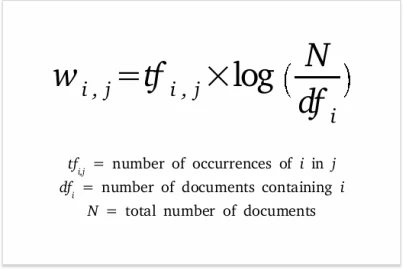
<!-- </div> -->
**Main Idea:** The importance of a word is determined by vectorizing or scoring it, which involves multiplying the word's Term Frequency (TF) with its Inverse Document Frequency (IDF).

**Related Formulae:**
1. **TF:** 
   - **TF** = *f_term / n_terms*
     - *f_term*: Number/frequency of the term appearing in a particular document.
     - *n_terms*: Total number of terms in that document.

2. **IDF:**
   - IDF of a term reflects the proportion of documents in the corpus that contain the term. It is a way of weighting more the unique/less frequent terms in the corpus and weighting less the frequently occurring words like "is," "and," "the," etc.
   - **IDF** = *log(Number of documents in the corpus / Number of documents in the corpus containing a particular term)*

3. **TF-IDF:** 
   - TF-IDF of a term is calculated as:
     - **TF-IDF** = *TF * IDF*
   
The importance of a particular term is high if it appears more frequently in one document and rarely in other documents of the corpus. In other words, the commonality of a term in one document is balanced by its rarity in other documents. Therefore, the TF-IDF score reflects the importance of a term in the corpus.

**Note**: This is a basic version of TF-IDF intended for comprehension purposes. Any potential errors or improvements are welcomed.


In [157]:
corpus=["The quick brown fox jumps over the lazy dog.",    
            "The dog barks loudly in the park.",   
            "A brown fox is seen near the park.",    
            "The lazy dog is sleeping.",   
            "The brown fox is quick and agile."]
n_documents=len(corpus)

word_lists = [word_tokenize(sent) for sent in corpus]
# excluding non alphabetical characters
word_lists = [[word.lower() for word in word_list if word.isalpha()] for word_list in word_lists ]
vocabulary_list=[]
for sublist in word_lists:
    vocabulary_list.extend(sublist)
vocabulary_set=sorted(set(vocabulary_list))
print('Total documents in corpus: ',n_documents)
print('Total words in vocabulary set: ',len(vocabulary_set))

Total documents in corpus:  5
Total words in vocabulary set:  19


In [129]:
# Index each word in the vocubalry set. It will be used to map the word to the vector
word_index={}
for idx, word in enumerate(vocabulary_set):
    word_index[word]=idx

In [135]:
# create a dictionary to record the number of documents that contain the given word
def count_dict(documents):
    count_dict={}
    for word in vocabulary_set:
        count_dict[word]=0

    for doc in documents:
        doc=word_tokenize(doc)
        for word in doc:
            if word.isalpha(): 
                count_dict[word.lower()]+=1
    return count_dict
    # return doc

word_count = count_dict(corpus)
word_count

{'a': 1,
 'agile': 1,
 'and': 1,
 'barks': 1,
 'brown': 3,
 'dog': 3,
 'fox': 3,
 'in': 1,
 'is': 3,
 'jumps': 1,
 'lazy': 2,
 'loudly': 1,
 'near': 1,
 'over': 1,
 'park': 2,
 'quick': 2,
 'seen': 1,
 'sleeping': 1,
 'the': 7}

In [131]:
# Calculate term frequency (TF) of each word
def term_freqeuncy(document, word):
    N = len(document)
    occurance = len([token for token in document if token==word])
    return occurance/N
# Inverse document frequency (IDF) for each word
def inverse_document_frequency(word):
    try:
        word_occurance=word_count[word]+1
    except:
        word_occurance=1
    idf = np.log(n_documents/word_occurance)
    return idf
inverse_document_frequency('what')


1.6094379124341003

In [145]:
# calculate TF-IDF
def tf_idf(document):
    document = [word.lower() for word in word_tokenize(document)] # lowering the alphabets
    document = [word for word in document if word.isalpha()] # excluding the punctuation marks

    vec = np.zeros((len(vocabulary_set), ))
    for word in document:
       tf = term_freqeuncy(document, word) 
       idf= inverse_document_frequency(word)
       vec[word_index[word]] = tf*idf
    return vec

tf_idf(corpus[0]).shape

(19,)

In [133]:
pd.DataFrame(columns=list(vocabulary_set))

,a,agile,and,barks,brown,dog,fox,in,is,jumps,lazy,loudly,near,over,park,quick,seen,sleeping,the


In [152]:
tfIdf=[]

for i in range(len(corpus)):
    tfIdf.append(tf_idf(corpus[i]))


In [155]:
tfIdf

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.02479373,
         0.02479373,  0.02479373,  0.        ,  0.        ,  0.10181008,
         0.0567584 ,  0.        ,  0.        ,  0.10181008,  0.        ,
         0.0567584 ,  0.        ,  0.        , -0.10444525]),
 array([ 0.        ,  0.        ,  0.        ,  0.13089868,  0.        ,
         0.03187765,  0.        ,  0.13089868,  0.        ,  0.        ,
         0.        ,  0.13089868,  0.        ,  0.        ,  0.07297509,
         0.        ,  0.        ,  0.        , -0.13428675]),
 array([ 0.11453634,  0.        ,  0.        ,  0.        ,  0.02789294,
         0.        ,  0.02789294,  0.        ,  0.02789294,  0.        ,
         0.        ,  0.        ,  0.11453634,  0.        ,  0.0638532 ,
         0.        ,  0.11453634,  0.        , -0.05875045]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04462871,  0.        ,  0.        ,  0.04462871,  0.        ,
         0.

,a,agile,and,barks,brown,dog,fox,in,is,jumps,lazy,loudly,near,over,park,quick,seen,sleeping,the
0,0.000000,0.000000,0.000000,0.000000,0.024794,0.024794,0.024794,0.000000,0.000000,0.10181,0.056758,0.000000,0.000000,0.10181,0.000000,0.056758,0.000000,0.000000,-0.104445
1,0.000000,0.000000,0.000000,0.130899,0.000000,0.031878,0.000000,0.130899,0.000000,0.00000,0.000000,0.130899,0.000000,0.00000,0.072975,0.000000,0.000000,0.000000,-0.134287
2,0.114536,0.000000,0.000000,0.000000,0.027893,0.000000,0.027893,0.000000,0.027893,0.00000,0.000000,0.000000,0.114536,0.00000,0.063853,0.000000,0.114536,0.000000,-0.058750
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.044629,0.000000,0.000000,0.044629,0.00000,0.102165,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.183258,-0.094001
4,0.000000,0.130899,0.130899,0.000000,0.031878,0.000000,0.031878,0.000000,0.031878,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.072975,0.000000,0.000000,-0.067143
